# 图像分类

在此项目中，你将对 [CIFAR-10 数据集](https://www.cs.toronto.edu/~kriz/cifar.html) 中的图片进行分类。该数据集包含飞机、猫狗和其他物体。你需要预处理这些图片，然后用所有样本训练一个卷积神经网络。图片需要标准化（normalized），标签需要采用 one-hot 编码。你需要应用所学的知识构建卷积的、最大池化（max pooling）、丢弃（dropout）和完全连接（fully connected）的层。最后，你需要在样本图片上看到神经网络的预测结果。


## 获取数据

请运行以下单元，以下载 [CIFAR-10 数据集（Python版）](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)。


In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## 探索数据

该数据集分成了几部分／批次（batches），以免你的机器在计算时内存不足。CIFAR-10 数据集包含 5 个部分，名称分别为 `data_batch_1`、`data_batch_2`，以此类推。每个部分都包含以下某个类别的标签和图片：

* 飞机
* 汽车
* 鸟类
* 猫
* 鹿
* 狗
* 青蛙
* 马
* 船只
* 卡车

了解数据集也是对数据进行预测的必经步骤。你可以通过更改 `batch_id` 和 `sample_id` 探索下面的代码单元。`batch_id` 是数据集一个部分的 ID（1 到 5）。`sample_id` 是该部分中图片和标签对（label pair）的 ID。

问问你自己：“可能的标签有哪些？”、“图片数据的值范围是多少？”、“标签是按顺序排列，还是随机排列的？”。思考类似的问题，有助于你预处理数据，并使预测结果更准确。



Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


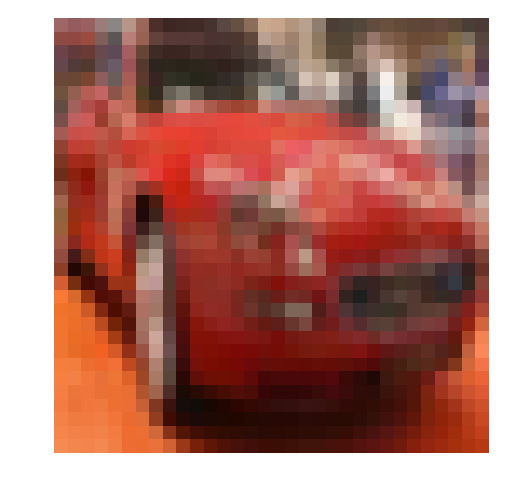

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## 实现预处理函数

### 标准化

在下面的单元中，实现 `normalize` 函数，传入图片数据 `x`，并返回标准化 Numpy 数组。值应该在 0 到 1 的范围内（含 0 和 1）。返回对象应该和 `x` 的形状一样。


In [3]:
import sklearn

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
#     shape = x.shape
#     x_flatten = x.astype(np.float32).flatten()
#     min_value, max_value = min(x_flatten), max(x_flatten)
#     for i, item in enumerate(x_flatten):
#         x_flatten[i] = (item - min_value) / (max_value - min_value)
#     return x_flatten.reshape(shape)


#     x_ = x.astype(np.float32).reshape(-1, x.shape[3])
#     out = sklearn.preprocessing.normalize(x_)
#     return out.reshape(x.shape)
    
    return x.astype(np.float32)/255

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot 编码

和之前的代码单元一样，你将为预处理实现一个函数。这次，你将实现 `one_hot_encode` 函数。输入，也就是 `x`，是一个标签列表。实现该函数，以返回为 one_hot 编码的 Numpy 数组的标签列表。标签的可能值为 0 到 9。每次调用 `one_hot_encode` 时，对于每个值，one_hot 编码函数应该返回相同的编码。确保将编码映射保存到该函数外面。

提示：不要重复发明轮子。


In [4]:
from sklearn.preprocessing import LabelBinarizer

one_hot_encoder = LabelBinarizer()
one_hot_encoder.fit(range(0,10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement 
    
    return one_hot_encoder.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### 随机化数据

之前探索数据时，你已经了解到，样本的顺序是随机的。再随机化一次也不会有什么关系，但是对于这个数据集没有必要。


## 预处理所有数据并保存

运行下方的代码单元，将预处理所有 CIFAR-10 数据，并保存到文件中。下面的代码还使用了 10% 的训练数据，用来验证。


In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# 检查点

这是你的第一个检查点。如果你什么时候决定再回到该记事本，或需要重新启动该记事本，你可以从这里开始。预处理的数据已保存到本地。


In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [7]:
valid_features.shape, valid_labels.shape

((5000, 32, 32, 3), (5000, 10))

## 构建网络

对于该神经网络，你需要将每层都构建为一个函数。你看到的大部分代码都位于函数外面。要更全面地测试你的代码，我们需要你将每层放入一个函数中。这样使我们能够提供更好的反馈，并使用我们的统一测试检测简单的错误，然后再提交项目。

>**注意**：如果你觉得每周很难抽出足够的时间学习这门课程，我们为此项目提供了一个小捷径。对于接下来的几个问题，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 程序包中的类来构建每个层级，但是“卷积和最大池化层级”部分的层级除外。TF Layers 和 Keras 及 TFLearn 层级类似，因此很容易学会。

>但是，如果你想充分利用这门课程，请尝试自己解决所有问题，不使用 TF Layers 程序包中的任何类。你依然可以使用其他程序包中的类，这些类和你在 TF Layers 中的类名称是一样的！例如，你可以使用 TF Neural Network 版本的 `conv2d` 类 [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)，而不是 TF Layers 版本的 `conv2d` 类 [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)。

我们开始吧！


### 输入

神经网络需要读取图片数据、one-hot 编码标签和丢弃保留概率（dropout keep probability）。请实现以下函数：

* 实现 `neural_net_image_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `image_shape` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "x" 命名
* 实现 `neural_net_label_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `n_classes` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "y" 命名
* 实现 `neural_net_keep_prob_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)，用于丢弃保留概率
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "keep_prob" 命名

这些名称将在项目结束时，用于加载保存的模型。

注意：TensorFlow 中的 `None` 表示形状可以是动态大小。

In [8]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None]+ list(image_shape), name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None, n_classes], name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### 卷积和最大池化层

卷积层级适合处理图片。对于此代码单元，你应该实现函数 `conv2d_maxpool` 以便应用卷积然后进行最大池化：

* 使用 `conv_ksize`、`conv_num_outputs` 和 `x_tensor` 的形状创建权重（weight）和偏置（bias）。
* 使用权重和 `conv_strides` 对 `x_tensor` 应用卷积。
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。
* 添加偏置
* 向卷积中添加非线性激活（nonlinear activation）
* 使用 `pool_ksize` 和 `pool_strides` 应用最大池化
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。

**注意**：对于**此层**，**请勿使用** [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers)，但是仍然可以使用 TensorFlow 的 [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) 包。对于所有**其他层**，你依然可以使用快捷方法。


In [32]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                   scope="conv2d_maxpool", bn_is_training=tf.constant(True)):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    with tf.variable_scope(scope):
        filter_size = [*conv_ksize, int(x_tensor.shape[-1:][0]), conv_num_outputs]
#         initializer = tf.random_normal_initializer(stddev=0.05)
#         initializer = tf.contrib.layers.xavier_initializer()
#         initializer = tf.glorot_uniform_initializer()
#         initializer = tf.glorot_normal_initializer()
        initializer = tf.contrib.keras.initializers.he_normal()
        conv_filter = tf.get_variable(name="w", shape=filter_size, initializer=initializer, dtype=tf.float32)
        conv_layer = tf.nn.conv2d(input=x_tensor, 
                                  filter=conv_filter, 
                                  strides=[1, *conv_strides, 1], 
                                  padding="SAME")
        bias = tf.get_variable(name="b", shape=[conv_num_outputs], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
        bias_conv_layer = tf.nn.bias_add(conv_layer, bias)
        # batch normal
        bn_layer = tf.contrib.layers.batch_norm(bias_conv_layer, center=True, scale=False, is_training=bn_is_training)
        
        nonliner_conv_layer = tf.nn.relu(bn_layer)

        # 使用pool_ksize=(0,0)控制不执行池化
        if pool_ksize[0] != 0:
            max_pool_layer = tf.nn.max_pool(nonliner_conv_layer, 
                                        ksize=[1, *pool_ksize, 1], 
                                        strides=[1, *pool_strides, 1],
                                        padding="SAME")
            return max_pool_layer 
        return nonliner_conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### 扁平化层

实现 `flatten` 函数，将 `x_tensor` 的维度从四维张量（4-D tensor）变成二维张量。输出应该是形状（*部分大小（Batch Size）*，*扁平化图片大小（Flattened Image Size）*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。


In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
#     print(x_tensor.shape)
#     print(tf.contrib.layers.flatten(x_tensor).shape)
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### 全连接层

实现 `fully_conn` 函数，以向 `x_tensor` 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

In [11]:
def fully_conn(x_tensor, num_outputs, scope="fc"):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
#     print(x_tensor.shape)
    return tf.contrib.layers.fully_connected(inputs=x_tensor, num_outputs=num_outputs, scope=scope)
        #weights_initializer=tf.random_normal_initializer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### 输出层

实现 `output` 函数，向 x_tensor 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

**注意**：该层级不应应用 Activation、softmax 或交叉熵（cross entropy）。

In [12]:
def output(x_tensor, num_outputs, scope="output"):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
#     print(x_tensor.shape)
    
    return tf.contrib.layers.fully_connected(inputs=x_tensor, num_outputs=num_outputs, activation_fn=None, scope=scope)
        # weights_initializer=tf.random_normal_initializer                                            

    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### 创建卷积模型

实现函数 `conv_net`， 创建卷积神经网络模型。该函数传入一批图片 `x`，并输出对数（logits）。使用你在上方创建的层创建此模型：

* 应用 1、2 或 3 个卷积和最大池化层（Convolution and Max Pool layers）
* 应用一个扁平层（Flatten Layer）
* 应用 1、2 或 3 个完全连接层（Fully Connected Layers）
* 应用一个输出层（Output Layer）
* 返回输出
* 使用 `keep_prob` 向模型中的一个或多个层应用 [TensorFlow 的 Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)

In [33]:
tf.get_variable_scope().reuse_variables()

def repeat_conv2d_maxpool(layer_num, x_tensor, conv_num_outputs, conv_ksize=(3,3), conv_strides=(1,1), pool_ksize=(2,2), pool_strides=(2,2), scope="conv2d_maxpool"):     
        x = x_tensor
        
        for i in range(0, layer_num - 1):
            x = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, (0,0), pool_strides, "{}_{}".format(scope, i))
        x = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, "{}_{}".format(scope, layer_num - 1))
        return x

scope_reused = False
    
def conv_net(x, keep_prob, bn_is_training=tf.constant(True)):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    x_tensor = x
    # vgg-16 卷积、池化层参数
    conv2d_pool_params = [
        (2, 64),
        (2, 128),
        (3, 256),
        (3, 512),
        (3, 512),
    ]

    for i, params in enumerate(conv2d_pool_params):
            x_tensor = repeat_conv2d_maxpool(params[0], x_tensor, params[1], scope="conv_{}_{}".format(i, params[1]))
#             x_tensor = tf.nn.dropout(x_tensor, keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    x_tensor = flatten(x_tensor)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    x_tensor = fully_conn(x_tensor, 4096, "fc1")
    
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    
    x_tensor = fully_conn(x_tensor, 4096, "fc2")
    
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    
    x_tensor = fully_conn(x_tensor, 1000, "fc3") 
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # TODO: return output
    return output(x_tensor, 10)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
# batch normal flag
bn_is_training = tf.placeholder(tf.bool, name="bn_is_training")

# Model
logits = conv_net(x, keep_prob, bn_is_training)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tf.get_variable_scope().reuse_variables()
tests.test_conv_net(conv_net)

Neural Network Built!


## 训练神经网络

### 单次优化

实现函数 `train_neural_network` 以进行单次优化（single optimization）。该优化应该使用 `optimizer` 优化 `session`，其中 `feed_dict` 具有以下参数：

* `x` 表示图片输入
* `y` 表示标签
* `keep_prob` 表示丢弃的保留率

每个部分都会调用该函数，所以 `tf.global_variables_initializer()` 已经被调用。

注意：不需要返回任何内容。该函数只是用来优化神经网络。


In [35]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch,
                         is_training=True):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    keep_prob_value = keep_probability[0] if hasattr(keep_probability, "__getitem__") else keep_probability
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_prob_value, 
                                      bn_is_training: is_training})
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### 显示数据

实现函数 `print_stats` 以输出损失和验证准确率。使用全局变量 `valid_features` 和 `valid_labels` 计算验证准确率。使用保留率 `1.0` 计算损失和验证准确率（loss and validation accuracy）。


In [23]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    global valid_features
    global valid_labels
    
    loss = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0, bn_is_training: True})
    acc = session.run(accuracy, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0, bn_is_training: True})
    
    valid_loss = session.run(cost, feed_dict={x:valid_features, y:valid_labels, keep_prob:1.0, bn_is_training: False})
    valid_acc = session.run(accuracy, feed_dict={x:valid_features, y:valid_labels, keep_prob:1.0, bn_is_training:False})
    
    print("loss: {:.4f}, acc: {:.4f}, valid_loss: {:.4f}, valid_acc: {:.4f}, ".format(loss, acc, valid_loss, valid_acc), end="")

### 超参数

调试以下超参数：
* 设置 `epochs` 表示神经网络停止学习或开始过拟合的迭代次数
* 设置 `batch_size`，表示机器内存允许的部分最大体积。大部分人设为以下常见内存大小：

 * 64
 * 128
 * 256
 * ...
* 设置 `keep_probability` 表示使用丢弃时保留节点的概率

In [16]:
# TODO: Tune Parameters
epochs = 200
batch_size = 1024
keep_probability = 0.5

### 在单个 CIFAR-10 部分上训练

我们先用单个部分，而不是用所有的 CIFAR-10 批次训练神经网络。这样可以节省时间，并对模型进行迭代，以提高准确率。最终验证准确率达到 50% 或以上之后，在下一部分对所有数据运行模型。


In [24]:
import time

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
            
    # Training cycle
    for epoch in range(epochs):
        start_time = time.time()
        batch_i = 1
                
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        end_time = time.time()
        print("[{}->{}], cost time: {:.2f} s".format(time.strftime("%m-%d %H:%M:%S", time.localtime(start_time)),
                                                time.strftime("%m-%d %H:%M:%S", time.localtime(end_time)),
                                                end_time - start_time))

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  loss: 2.2608, acc: 0.1361, valid_loss: 2.2657, valid_acc: 0.1346, [02-22 15:35:07->02-22 15:35:14], cost time: 6.88 s
Epoch  2, CIFAR-10 Batch 1:  loss: 2.2392, acc: 0.1448, valid_loss: 2.2398, valid_acc: 0.1396, [02-22 15:35:14->02-22 15:35:19], cost time: 5.20 s
Epoch  3, CIFAR-10 Batch 1:  loss: 2.2020, acc: 0.1696, valid_loss: 2.2095, valid_acc: 0.1564, [02-22 15:35:19->02-22 15:35:24], cost time: 5.22 s
Epoch  4, CIFAR-10 Batch 1:  loss: 2.1436, acc: 0.1572, valid_loss: 2.1486, valid_acc: 0.1590, [02-22 15:35:24->02-22 15:35:30], cost time: 5.23 s
Epoch  5, CIFAR-10 Batch 1:  loss: 2.0845, acc: 0.1696, valid_loss: 2.0712, valid_acc: 0.1578, [02-22 15:35:30->02-22 15:35:35], cost time: 5.25 s
Epoch  6, CIFAR-10 Batch 1:  loss: 2.0412, acc: 0.1658, valid_loss: 2.0397, valid_acc: 0.1736, [02-22 15:35:35->02-22 15:35:40], cost time: 5.27 s
Epoch  7, CIFAR-10 Batch 1:  loss: 2.0018, acc: 0.1733, valid_loss: 1.9984,

Epoch 57, CIFAR-10 Batch 1:  loss: 0.0914, acc: 0.9777, valid_loss: 2.0012, valid_acc: 0.5968, [02-22 15:40:13->02-22 15:40:18], cost time: 5.53 s
Epoch 58, CIFAR-10 Batch 1:  loss: 0.0594, acc: 0.9876, valid_loss: 2.2381, valid_acc: 0.5972, [02-22 15:40:18->02-22 15:40:24], cost time: 5.41 s
Epoch 59, CIFAR-10 Batch 1:  loss: 0.0485, acc: 0.9889, valid_loss: 2.3246, valid_acc: 0.5984, [02-22 15:40:24->02-22 15:40:29], cost time: 5.53 s
Epoch 60, CIFAR-10 Batch 1:  loss: 0.0614, acc: 0.9827, valid_loss: 2.3717, valid_acc: 0.6000, [02-22 15:40:29->02-22 15:40:35], cost time: 5.39 s
Epoch 61, CIFAR-10 Batch 1:  loss: 0.0626, acc: 0.9814, valid_loss: 2.1411, valid_acc: 0.5932, [02-22 15:40:35->02-22 15:40:40], cost time: 5.53 s
Epoch 62, CIFAR-10 Batch 1:  loss: 0.0581, acc: 0.9814, valid_loss: 2.1403, valid_acc: 0.6284, [02-22 15:40:40->02-22 15:40:46], cost time: 5.45 s
Epoch 63, CIFAR-10 Batch 1:  loss: 0.0313, acc: 0.9926, valid_loss: 2.3605, valid_acc: 0.6108, [02-22 15:40:46->02-22 

Epoch 113, CIFAR-10 Batch 1:  loss: 0.0127, acc: 0.9975, valid_loss: 2.4341, valid_acc: 0.6448, [02-22 15:45:20->02-22 15:45:26], cost time: 5.55 s
Epoch 114, CIFAR-10 Batch 1:  loss: 0.0096, acc: 0.9975, valid_loss: 2.4713, valid_acc: 0.6524, [02-22 15:45:26->02-22 15:45:31], cost time: 5.39 s
Epoch 115, CIFAR-10 Batch 1:  loss: 0.0024, acc: 1.0000, valid_loss: 2.5477, valid_acc: 0.6530, [02-22 15:45:31->02-22 15:45:36], cost time: 5.39 s
Epoch 116, CIFAR-10 Batch 1:  loss: 0.0029, acc: 1.0000, valid_loss: 2.7660, valid_acc: 0.6556, [02-22 15:45:36->02-22 15:45:42], cost time: 5.57 s
Epoch 117, CIFAR-10 Batch 1:  loss: 0.0017, acc: 1.0000, valid_loss: 2.8385, valid_acc: 0.6486, [02-22 15:45:42->02-22 15:45:48], cost time: 5.51 s
Epoch 118, CIFAR-10 Batch 1:  loss: 0.0032, acc: 1.0000, valid_loss: 2.5978, valid_acc: 0.6456, [02-22 15:45:48->02-22 15:45:53], cost time: 5.53 s
Epoch 119, CIFAR-10 Batch 1:  loss: 0.0060, acc: 0.9988, valid_loss: 2.5335, valid_acc: 0.6602, [02-22 15:45:53-

Epoch 169, CIFAR-10 Batch 1:  loss: 0.0007, acc: 1.0000, valid_loss: 2.8921, valid_acc: 0.6608, [02-22 15:50:28->02-22 15:50:34], cost time: 5.46 s
Epoch 170, CIFAR-10 Batch 1:  loss: 0.0008, acc: 1.0000, valid_loss: 2.8094, valid_acc: 0.6722, [02-22 15:50:34->02-22 15:50:39], cost time: 5.48 s
Epoch 171, CIFAR-10 Batch 1:  loss: 0.0009, acc: 1.0000, valid_loss: 2.8032, valid_acc: 0.6682, [02-22 15:50:39->02-22 15:50:45], cost time: 5.47 s
Epoch 172, CIFAR-10 Batch 1:  loss: 0.0072, acc: 0.9988, valid_loss: 2.8107, valid_acc: 0.6656, [02-22 15:50:45->02-22 15:50:50], cost time: 5.60 s
Epoch 173, CIFAR-10 Batch 1:  loss: 0.0026, acc: 1.0000, valid_loss: 2.9592, valid_acc: 0.6602, [02-22 15:50:50->02-22 15:50:56], cost time: 5.54 s
Epoch 174, CIFAR-10 Batch 1:  loss: 0.0033, acc: 0.9988, valid_loss: 2.9457, valid_acc: 0.6668, [02-22 15:50:56->02-22 15:51:01], cost time: 5.42 s
Epoch 175, CIFAR-10 Batch 1:  loss: 0.0012, acc: 1.0000, valid_loss: 2.8811, valid_acc: 0.6702, [02-22 15:51:01-

### 完全训练模型

现在，单个 CIFAR-10 部分的准确率已经不错了，试试所有五个部分吧。

In [29]:
# 减少epochs为100节省训练时间
epochs = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            print("")
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  loss: 2.2929, acc: 0.1027, valid_loss: 2.2858, valid_acc: 0.0978, 
Epoch  1, CIFAR-10 Batch 2:  loss: 2.2986, acc: 0.0978, valid_loss: 2.2909, valid_acc: 0.0996, 
Epoch  1, CIFAR-10 Batch 3:  loss: 2.2640, acc: 0.1386, valid_loss: 2.2700, valid_acc: 0.1210, 
Epoch  1, CIFAR-10 Batch 4:  loss: 2.2352, acc: 0.1485, valid_loss: 2.2440, valid_acc: 0.1260, 
Epoch  1, CIFAR-10 Batch 5:  loss: 2.1833, acc: 0.1522, valid_loss: 2.2052, valid_acc: 0.1462, 
Epoch  2, CIFAR-10 Batch 1:  loss: 2.1337, acc: 0.1807, valid_loss: 2.1330, valid_acc: 0.1674, 
Epoch  2, CIFAR-10 Batch 2:  loss: 2.0686, acc: 0.1819, valid_loss: 2.0965, valid_acc: 0.1810, 
Epoch  2, CIFAR-10 Batch 3:  loss: 2.0395, acc: 0.1931, valid_loss: 2.0499, valid_acc: 0.1652, 
Epoch  2, CIFAR-10 Batch 4:  loss: 1.9736, acc: 0.2030, valid_loss: 1.9777, valid_acc: 0.2006, 
Epoch  2, CIFAR-10 Batch 5:  loss: 1.9315, acc: 0.2203, valid_loss: 1.9218, valid_acc: 0.2128, 
Epoch  3, CIFAR-10 Batch 1: 

Epoch 18, CIFAR-10 Batch 1:  loss: 0.2484, acc: 0.9307, valid_loss: 0.6790, valid_acc: 0.8038, 
Epoch 18, CIFAR-10 Batch 2:  loss: 0.2342, acc: 0.9344, valid_loss: 0.7340, valid_acc: 0.7966, 
Epoch 18, CIFAR-10 Batch 3:  loss: 0.2298, acc: 0.9307, valid_loss: 0.6763, valid_acc: 0.8026, 
Epoch 18, CIFAR-10 Batch 4:  loss: 0.2091, acc: 0.9295, valid_loss: 0.6722, valid_acc: 0.8074, 
Epoch 18, CIFAR-10 Batch 5:  loss: 0.1866, acc: 0.9455, valid_loss: 0.6973, valid_acc: 0.8036, 
Epoch 19, CIFAR-10 Batch 1:  loss: 0.1930, acc: 0.9468, valid_loss: 0.6869, valid_acc: 0.8018, 
Epoch 19, CIFAR-10 Batch 2:  loss: 0.2043, acc: 0.9270, valid_loss: 0.7368, valid_acc: 0.7992, 
Epoch 19, CIFAR-10 Batch 3:  loss: 0.1952, acc: 0.9356, valid_loss: 0.6708, valid_acc: 0.8128, 
Epoch 19, CIFAR-10 Batch 4:  loss: 0.1873, acc: 0.9418, valid_loss: 0.6622, valid_acc: 0.8064, 
Epoch 19, CIFAR-10 Batch 5:  loss: 0.1676, acc: 0.9455, valid_loss: 0.6859, valid_acc: 0.8080, 
Epoch 20, CIFAR-10 Batch 1:  loss: 0.165

Epoch 35, CIFAR-10 Batch 2:  loss: 0.0298, acc: 0.9926, valid_loss: 0.7999, valid_acc: 0.8474, 
Epoch 35, CIFAR-10 Batch 3:  loss: 0.0155, acc: 0.9963, valid_loss: 0.8510, valid_acc: 0.8394, 
Epoch 35, CIFAR-10 Batch 4:  loss: 0.0262, acc: 0.9950, valid_loss: 0.9001, valid_acc: 0.8396, 
Epoch 35, CIFAR-10 Batch 5:  loss: 0.0092, acc: 1.0000, valid_loss: 0.9347, valid_acc: 0.8312, 
Epoch 36, CIFAR-10 Batch 1:  loss: 0.0169, acc: 0.9963, valid_loss: 0.8728, valid_acc: 0.8410, 
Epoch 36, CIFAR-10 Batch 2:  loss: 0.0174, acc: 0.9963, valid_loss: 0.8031, valid_acc: 0.8496, 
Epoch 36, CIFAR-10 Batch 3:  loss: 0.0087, acc: 0.9988, valid_loss: 0.8689, valid_acc: 0.8364, 
Epoch 36, CIFAR-10 Batch 4:  loss: 0.0184, acc: 0.9963, valid_loss: 0.8469, valid_acc: 0.8410, 
Epoch 36, CIFAR-10 Batch 5:  loss: 0.0133, acc: 0.9975, valid_loss: 0.9463, valid_acc: 0.8362, 
Epoch 37, CIFAR-10 Batch 1:  loss: 0.0217, acc: 0.9975, valid_loss: 0.8911, valid_acc: 0.8356, 
Epoch 37, CIFAR-10 Batch 2:  loss: 0.026

Epoch 52, CIFAR-10 Batch 3:  loss: 0.0043, acc: 0.9988, valid_loss: 0.9509, valid_acc: 0.8494, 
Epoch 52, CIFAR-10 Batch 4:  loss: 0.0042, acc: 1.0000, valid_loss: 0.9128, valid_acc: 0.8474, 
Epoch 52, CIFAR-10 Batch 5:  loss: 0.0094, acc: 0.9975, valid_loss: 0.9085, valid_acc: 0.8410, 
Epoch 53, CIFAR-10 Batch 1:  loss: 0.0152, acc: 0.9975, valid_loss: 0.8892, valid_acc: 0.8510, 
Epoch 53, CIFAR-10 Batch 2:  loss: 0.0099, acc: 0.9988, valid_loss: 0.9163, valid_acc: 0.8486, 
Epoch 53, CIFAR-10 Batch 3:  loss: 0.0041, acc: 1.0000, valid_loss: 0.9391, valid_acc: 0.8458, 
Epoch 53, CIFAR-10 Batch 4:  loss: 0.0062, acc: 1.0000, valid_loss: 0.8961, valid_acc: 0.8472, 
Epoch 53, CIFAR-10 Batch 5:  loss: 0.0072, acc: 0.9988, valid_loss: 0.8746, valid_acc: 0.8506, 
Epoch 54, CIFAR-10 Batch 1:  loss: 0.0144, acc: 0.9988, valid_loss: 0.9057, valid_acc: 0.8478, 
Epoch 54, CIFAR-10 Batch 2:  loss: 0.0309, acc: 0.9950, valid_loss: 0.8963, valid_acc: 0.8458, 
Epoch 54, CIFAR-10 Batch 3:  loss: 0.006

Epoch 69, CIFAR-10 Batch 4:  loss: 0.0021, acc: 1.0000, valid_loss: 0.9423, valid_acc: 0.8492, 
Epoch 69, CIFAR-10 Batch 5:  loss: 0.0020, acc: 1.0000, valid_loss: 0.9374, valid_acc: 0.8514, 
Epoch 70, CIFAR-10 Batch 1:  loss: 0.0023, acc: 1.0000, valid_loss: 0.9805, valid_acc: 0.8524, 
Epoch 70, CIFAR-10 Batch 2:  loss: 0.0034, acc: 0.9988, valid_loss: 1.0312, valid_acc: 0.8516, 
Epoch 70, CIFAR-10 Batch 3:  loss: 0.0023, acc: 1.0000, valid_loss: 1.0190, valid_acc: 0.8540, 
Epoch 70, CIFAR-10 Batch 4:  loss: 0.0120, acc: 0.9950, valid_loss: 0.9759, valid_acc: 0.8430, 
Epoch 70, CIFAR-10 Batch 5:  loss: 0.0040, acc: 0.9988, valid_loss: 0.9188, valid_acc: 0.8466, 
Epoch 71, CIFAR-10 Batch 1:  loss: 0.0024, acc: 1.0000, valid_loss: 0.9434, valid_acc: 0.8494, 
Epoch 71, CIFAR-10 Batch 2:  loss: 0.0034, acc: 0.9988, valid_loss: 1.0150, valid_acc: 0.8560, 
Epoch 71, CIFAR-10 Batch 3:  loss: 0.0010, acc: 1.0000, valid_loss: 1.0217, valid_acc: 0.8556, 
Epoch 71, CIFAR-10 Batch 4:  loss: 0.001

Epoch 86, CIFAR-10 Batch 5:  loss: 0.0049, acc: 0.9988, valid_loss: 1.1426, valid_acc: 0.8466, 
Epoch 87, CIFAR-10 Batch 1:  loss: 0.0081, acc: 0.9988, valid_loss: 0.9505, valid_acc: 0.8420, 
Epoch 87, CIFAR-10 Batch 2:  loss: 0.0082, acc: 0.9975, valid_loss: 0.8963, valid_acc: 0.8516, 
Epoch 87, CIFAR-10 Batch 3:  loss: 0.0025, acc: 1.0000, valid_loss: 1.0302, valid_acc: 0.8522, 
Epoch 87, CIFAR-10 Batch 4:  loss: 0.0038, acc: 1.0000, valid_loss: 1.0646, valid_acc: 0.8504, 
Epoch 87, CIFAR-10 Batch 5:  loss: 0.0053, acc: 0.9988, valid_loss: 0.9736, valid_acc: 0.8488, 
Epoch 88, CIFAR-10 Batch 1:  loss: 0.0038, acc: 0.9988, valid_loss: 0.9618, valid_acc: 0.8512, 
Epoch 88, CIFAR-10 Batch 2:  loss: 0.0033, acc: 0.9988, valid_loss: 1.0532, valid_acc: 0.8540, 
Epoch 88, CIFAR-10 Batch 3:  loss: 0.0012, acc: 1.0000, valid_loss: 1.0929, valid_acc: 0.8548, 
Epoch 88, CIFAR-10 Batch 4:  loss: 0.0033, acc: 1.0000, valid_loss: 1.0275, valid_acc: 0.8430, 
Epoch 88, CIFAR-10 Batch 5:  loss: 0.008

# 检查点

模型已保存到本地。

## 测试模型

利用测试数据集测试你的模型。这将是最终的准确率。你的准确率应该高于 50%。如果没达到，请继续调整模型结构和参数。

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.8510343551635742



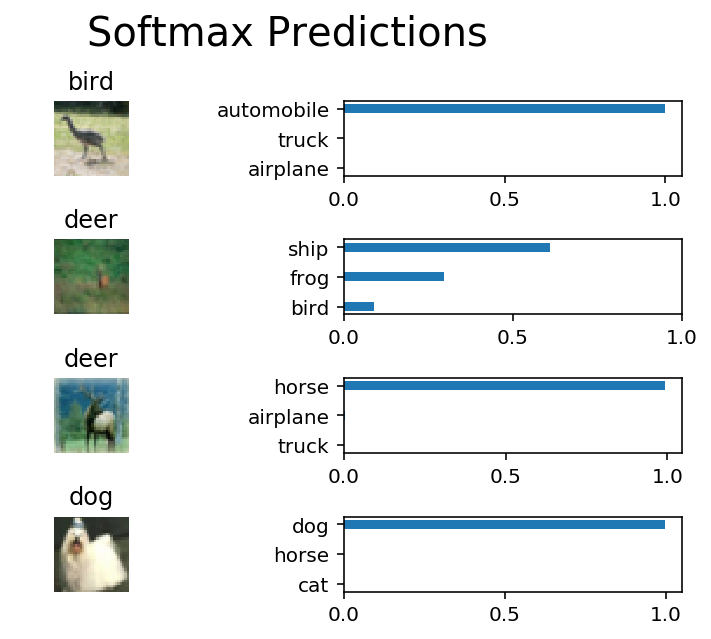

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## 为何准确率只有50-80%？

你可能想问，为何准确率不能更高了？首先，对于简单的 CNN 网络来说，50% 已经不低了。纯粹猜测的准确率为10%。但是，你可能注意到有人的准确率[远远超过 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)。这是因为我们还没有介绍所有的神经网络知识。我们还需要掌握一些其他技巧。

## 提交项目

提交项目时，确保先运行所有单元，然后再保存记事本。将 notebook 文件另存为“dlnd_image_classification.ipynb”，再在目录 "File" -> "Download as" 另存为 HTML 格式。请在提交的项目中包含 “helper.py” 和 “problem_unittests.py” 文件。
